In [1]:
#데이터 시각화 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('/content/train.csv')

df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [2]:
# 간단한 통계 정보 확인
print(df.describe())

             label  binary-label
count  9324.000000   9324.000000
mean      1.849968      0.389532
std       1.602212      0.487670
min       0.000000      0.000000
25%       0.200000      0.000000
50%       1.600000      0.000000
75%       3.400000      1.000000
max       5.000000      1.000000


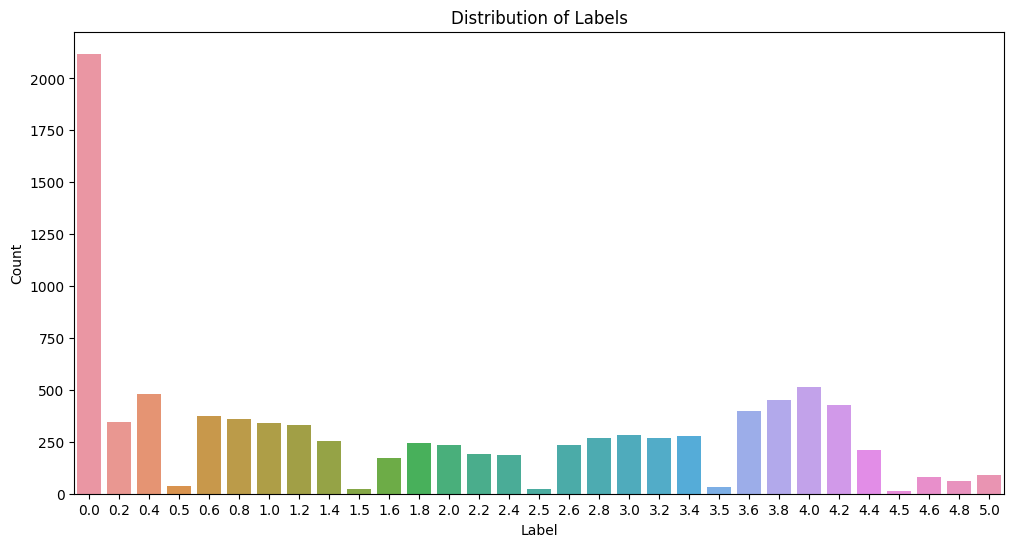

In [3]:
# 막대 그래프로 모든 레이블 값에 대한 분포 보기
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

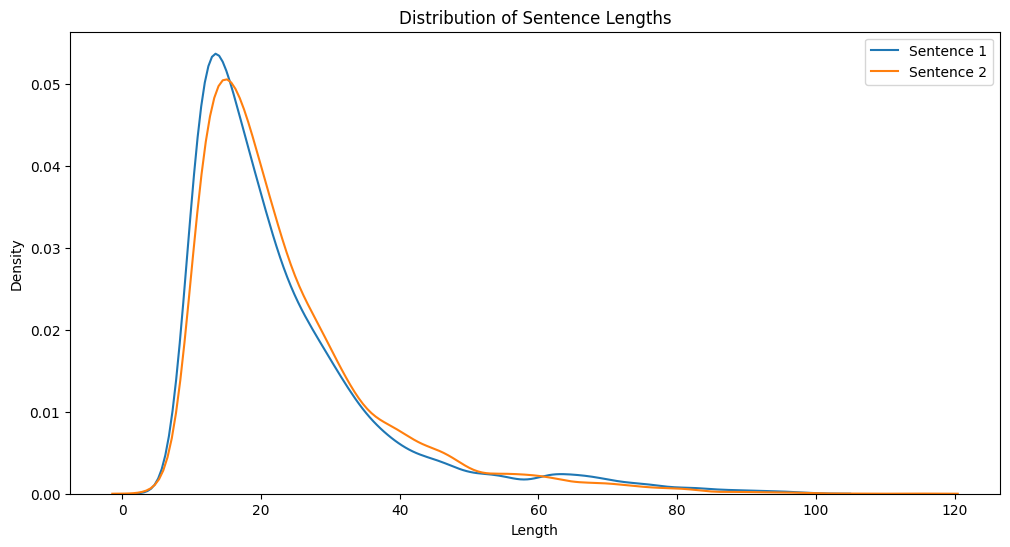

In [4]:
# 두 문장의 길이 비교
df['sentence_1_len'] = df['sentence_1'].apply(len)
df['sentence_2_len'] = df['sentence_2'].apply(len)

plt.figure(figsize=(12, 6))
sns.kdeplot(df['sentence_1_len'], label='Sentence 1')
sns.kdeplot(df['sentence_2_len'], label='Sentence 2')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length')
plt.ylabel('Density')
plt.legend()
plt.show()

#전처리 들어갑니다잉

In [5]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-jzc4br_t
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-jzc4br_t
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4809 sha256=b04e7477291f744795190a471bc63313ab41033dee4605b52bfcc74e60c71b24
  Stored in directory: /tmp/pip-ephem-wheel-cache-7bsp0yt2/wheels/2e/43/cc/753c9e1d91affb9ea40e186cea5654fb9231deb454da6724e5
Successfully built py-hanspell


In [6]:
import re
from hanspell import spell_checker  # 띄어쓰기 맞춤법 검사기

#한글을 제외한 모든 문자 제거
def preprocess_text(sentence):
    # 1. 한글과 영어를 모두 살려둠
    sentence = re.sub(r'[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣\s]', '', sentence)

    # 2. 특수문자가 연속으로 여러 번 있는 경우, 한 개만 남김
    sentence = re.sub(r'([^\w\s])\1+', r'\1', sentence)

    # 3. 띄어쓰기 맞춤법이 잘못되어 있는 경우, 수정
    #spelled_sentence = spell_checker.check(sentence)
    #corrected_sentence = spelled_sentence.checked

    #return corrected_sentence
    return sentence

In [7]:
original_sentence = "안녕하세요!! 특수문자가 연속으로.....여러 번 있네요. 띄어쓰기 맞춤법이 틀렸습니다."
processed_sentence = preprocess_text(original_sentence)
print(processed_sentence)

안녕하세요 특수문자가 연속으로여러 번 있네요 띄어쓰기 맞춤법이 틀렸습니다


#SEN1과 SEN2 위치 변경해서 증강

In [8]:
#데이터 시각화 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터셋을 DataFrame으로 불러오기 (예: csv 파일을 사용하는 경우)
df = pd.read_csv('/content/train.csv')

# 'label'이 0.0이 아닌 행만 선택
filtered_df = df[df['label'] != 0.0]

# 'sentence_1'과 'sentence_2'를 교환하여 새로운 행을 만들기
swapped_df = filtered_df.copy()
swapped_df['temp'] = swapped_df['sentence_1']
swapped_df['sentence_1'] = swapped_df['sentence_2']
swapped_df['sentence_2'] = swapped_df['temp']
swapped_df.drop(columns=['temp'], inplace=True)

# 'id'를 순차적으로 증가시키기
max_id = df['id'].apply(lambda x: int(x.split('-')[-1])).max()
swapped_df['id'] = [f'boostcamp-sts-v1-train-{i}' for i in range(max_id + 1, max_id + 1 + len(swapped_df))]

# 새로운 행을 기존 DataFrame에 추가
df = pd.concat([df, swapped_df], ignore_index=True)

# 결과를 새로운 csv 파일로 저장
df.to_csv('new_dataset.csv', index=False)


#문장 증강 후 데이터 분포 살펴보기

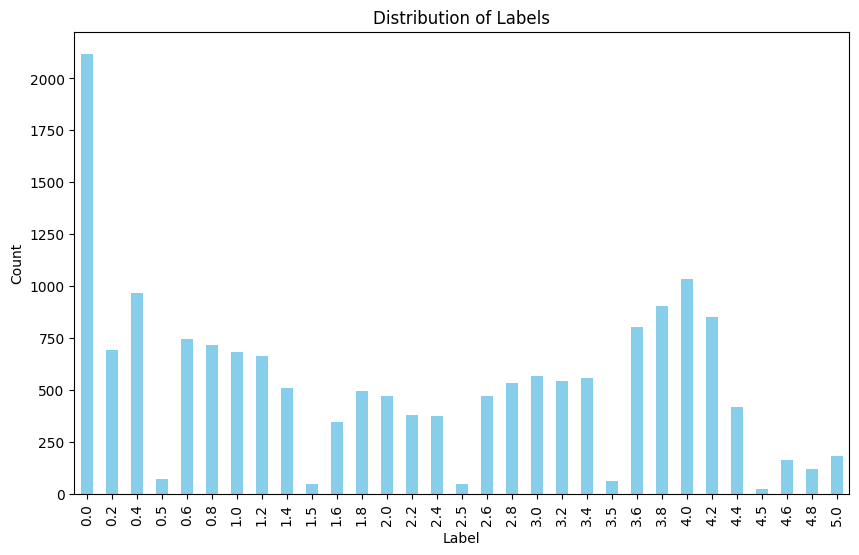

In [9]:
# 데이터셋을 DataFrame으로 불러오기 (예: csv 파일을 사용하는 경우)
df = pd.read_csv('new_dataset.csv')

# 레이블 값에 대한 분포 확인
label_distribution = df['label'].value_counts()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
label_distribution.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 증강하지 않고, Label이 0.0이 아닌 데이터들 그냥 문장 순서 자체만 바꿔보기

In [10]:
# 데이터셋을 DataFrame으로 불러오기 (예: csv 파일을 사용하는 경우)
df = pd.read_csv('/content/train.csv')

# 레이블이 0.0이 아닌 데이터에 대해 sentence_1과 sentence_2의 위치를 바꾸기
non_zero_label_df = df[df['label'] != 0.0].copy()
non_zero_label_df[['sentence_1', 'sentence_2']] = non_zero_label_df[['sentence_2', 'sentence_1']]

# 모든 데이터에 대해 레이블이 0.0인 데이터도 포함하여 저장
all_data_df = pd.concat([df[df['label'] == 0.0], non_zero_label_df], ignore_index=True)

# 결과를 새로운 csv 파일로 저장
all_data_df.to_csv('sentence_only_changed.csv', index=False)

#각 source별로 데이터 개수 파악

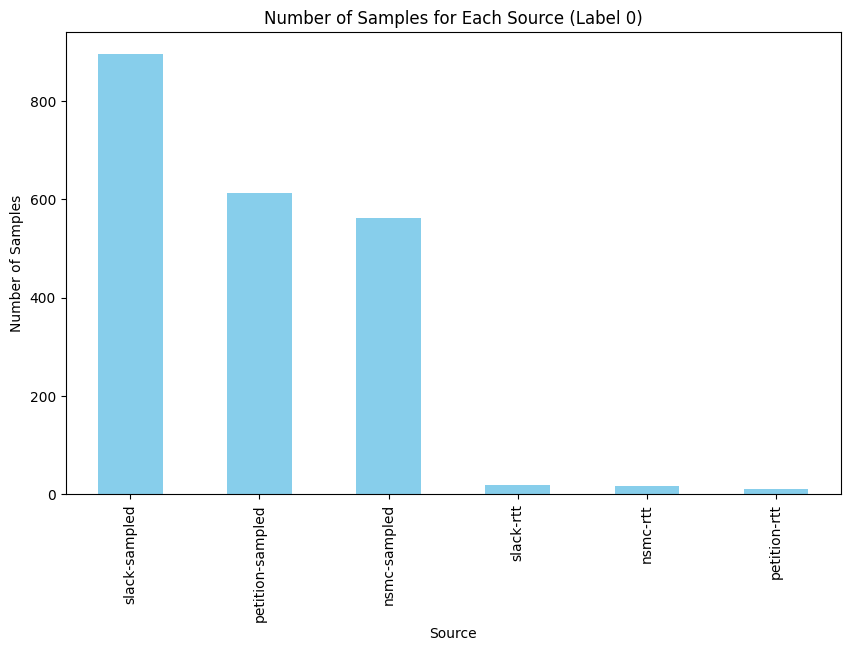

In [11]:
df = pd.read_csv('/content/train.csv')

# Label이 0인 값에 대한 데이터만 선택
zero_label_df = df[df['label'] == 0]

# source에 따라 데이터셋 그룹화 및 개수 세기
source_counts = zero_label_df['source'].value_counts()

# 차트로 시각화
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples for Each Source (Label 0)')
plt.xlabel('Source')
plt.ylabel('Number of Samples')
plt.show()

#Label 0.0 데이터를 떼서 5.0으로 옮겨주기(몇개?) - 500개
#-> slack-sampled 100, petition-sampled 200, nsmc-sampled 200개
- 선정 후 각 문장1, 문장2를 나누어서 모두 Label 5.0으로 만들 거
- 그러기 위해 문장 2 부분을 따로 빼서 추가 증강 / 문장 1이 남은 곳에 라벨 5로 변경
- 추가한 문장 2 부분을 데이터셋에 추가 / 라벨 5로 설정 + 적절한 띄어쓰기 문장 생성

In [49]:
import pandas as pd

# 데이터셋을 DataFrame으로 불러오기 (예: csv 파일을 사용하는 경우)
df = pd.read_csv('/content/train.csv')

# 'label'이 0.0인 데이터만 선택
zero_label_df = df[df['label'] == 0.0]


# 각 소스별로 일정 개수의 문장 선택
slack_rtt_sentences = zero_label_df[zero_label_df['source'] == 'slack-sampled'].head(100)
petition_rtt_sentences = zero_label_df[zero_label_df['source'] == 'petition-sampled'].head(200)
nsmc_rtt_sentences = zero_label_df[zero_label_df['source'] == 'nsmc-sampled'].head(200)


print("slack_rtt_sentences 개수:", len(slack_rtt_sentences))
print("petition_rtt_sentences 개수:", len(petition_rtt_sentences))
print("nsmc_rtt_sentences 개수:", len(nsmc_rtt_sentences))



# 선택된 문장들을 하나의 DataFrame으로 합치기
selected_sentences = pd.concat([slack_rtt_sentences, petition_rtt_sentences, nsmc_rtt_sentences], ignore_index=True)


# 결과를 새로운 csv 파일로 저장
selected_sentences.to_csv('selected_sentences.csv', index=False)

slack_rtt_sentences 개수: 100
petition_rtt_sentences 개수: 200
nsmc_rtt_sentences 개수: 200


train.csv에서, label이 0.0인 문장을 떼왔어.
떼온 부분의 Label을 5.0으로 바꿔주고,
문장 2 만을 떼와서 새로운 데이터셋을 만들거야.

id는 boostcamp-sts-v1-train-9324부터 순차적으로 증가하고, source, label, binary_label은 기존 데이터에서 그대로 가져와서 넣어줘.
그리고, 떼온 문장 2는 문장 1에 넣어줘.

In [50]:
# train.csv를 DataFrame으로 불러오기
df_train = pd.read_csv('train.csv')


#train에서 데이터 변경

# 'slack-rtt', 'petition-rtt', 'nsmc-rtt' 소스에 해당하는 데이터 인덱스 추출 / label 0인 데이만
slack_rtt_indices = df_train[(df_train['source'] == 'slack-sampled') & (df_train['label'] == 0.0)].head(100).index
petition_rtt_indices = df_train[(df_train['source'] == 'petition-sampled') & (df_train['label'] == 0.0)].head(200).index
nsmc_rtt_indices = df_train[(df_train['source'] == 'nsmc-sampled') & (df_train['label'] == 0.0)].head(200).index

# 'label'이 0.0인 데이터만 선택
zero_label_df = df[df['label'] == 0.0]

# 각 소스별로 일정 개수의 문장 선택
slack_rtt_sentences = zero_label_df[zero_label_df['source'] == 'slack-sampled'].head(100)
petition_rtt_sentences = zero_label_df[zero_label_df['source'] == 'petition-sampled'].head(200)
nsmc_rtt_sentences = zero_label_df[zero_label_df['source'] == 'nsmc-sampled'].head(200)

# 선택된 문장들을 하나의 DataFrame으로 합치기
selected_sentences = pd.concat([slack_rtt_sentences, petition_rtt_sentences, nsmc_rtt_sentences], ignore_index=True)

# 추출된 데이터의 인덱스를 참조하여 라벨을 5.0으로 변경
df_train.loc[slack_rtt_indices, 'label'] = 5.0
df_train.loc[petition_rtt_indices, 'label'] = 5.0
df_train.loc[nsmc_rtt_indices, 'label'] = 5.0

df_train.loc[slack_rtt_indices, 'binary-label'] = 1
df_train.loc[petition_rtt_indices, 'binary-label'] = 1
df_train.loc[nsmc_rtt_indices, 'binary-label'] = 1


- 완료 : 변환할 문장 500개 선정 + 문장데이터 따로 복사 + train에서 해당 데이터 라벨 변경
- 이제 할거 : 해당 데이터의 SEN2를 가지고 새로운 데이터 생성

In [51]:
#selecetd_sentences를 이용

#이제 new_data에 문장2 데이터셋 생성해서 train.csv에 추가할거

# 새로운 데이터셋을 위한 DataFrame 생성
new_data = pd.DataFrame(columns=['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'])

# id를 boostcamp-sts-v1-train-9324부터 순차적으로 증가
new_data['id'] = [f'boostcamp-sts-v1-train-{i}' for i in range(9324, 9324 + len(selected_sentences))]

# source, label, binary_label은 기존 데이터에서 가져오기
new_data[['source', 'label', 'binary-label']] = selected_sentences[['source', 'label', 'binary-label']]

# 문장 2를 문장 1에 넣어주기
new_data['sentence_1'] = selected_sentences['sentence_2']

# label을 5.0으로 바꾸기
new_data['label'] = 5.0
new_data['binary-label'] = 1

# 문장 2를 잘라내서 새로운 데이터로 추가
new_data['sentence_1'] = selected_sentences['sentence_2']





- 완료 : 새로운 데이터 셋 생성
- 이제 할거: 전처리 함수 작성 + 수정한 데이터들에게 SEN2를 생성해서 넣어줘야 함

In [ ]:
#!pip install git+https://github.com/ssut/py-hanspell.git
#!pip install requests

In [ ]:
#!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [13]:
'''
from hanspell import spell_checker
text = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
result = spell_checker.check(text)
print(type(result))
'''

'\nfrom hanspell import spell_checker\ntext = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "\nresult = spell_checker.check(text)\nprint(type(result))\n'

In [63]:
from hanspell import spell_checker
import requests
from pykospacing import Spacing

# 전처리 함수
def preprocess_text(sentence):
    # 공백 있는 문자열

    no_space = sentence.replace(" " , "")    # replace 함수를 이용해서 공백 제거
    spacing = Spacing()
    return spacing(sentence)     #띄어쓰기 진행

a = preprocess_text("맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 ")
print(a)

맞춤법 틀리면 외 않되? 쓰고 싶은 대로 쓰면 돼지


In [53]:
# 각 소스별로 일정 개수의 문장 선택
slack_rtt_sentences
petition_rtt_sentences
nsmc_rtt_sentences

# 'sentence_1'을 전처리하여 'sentence_2'에 대입 (slack-rtt, petition-rtt, nsmc-rtt에 해당하는 데이터만 처리)
df_train.loc[slack_rtt_indices, 'sentence_2'] = df_train.loc[slack_rtt_indices, 'sentence_1'].apply(preprocess_text)
df_train.loc[petition_rtt_indices, 'sentence_2'] = df_train.loc[petition_rtt_indices, 'sentence_1'].apply(preprocess_text)
df_train.loc[nsmc_rtt_indices, 'sentence_2'] = df_train.loc[nsmc_rtt_indices, 'sentence_1'].apply(preprocess_text)

In [54]:
# 'slack_rtt_indices', 'petition_rtt_indices', 'nsmc_rtt_indices'에 해당하는 데이터프레임 확인
slack_rtt_data = df_train.loc[slack_rtt_indices, ['sentence_1', 'sentence_2']]
petition_rtt_data = df_train.loc[petition_rtt_indices, ['sentence_1', 'sentence_2']]
nsmc_rtt_data = df_train.loc[nsmc_rtt_indices, ['sentence_1', 'sentence_2']]

# 출력
print("slack_rtt_data:")
print(slack_rtt_data)

print("\npetition_rtt_data:")
print(petition_rtt_data)

print("\nnsmc_rtt_data:")
print(nsmc_rtt_data)

slack_rtt_data:
                                       sentence_1  \
4                                      뿌듯뿌듯 하네요!!   
14                아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.   
20                               앞머리 새로 하셨습니다. ^^   
22                         답답할 때 보면 속이 뻥 뚫릴 것 같아요   
46                          저는 왜 솥에 들어가계시나 했어요 ㅋㅋ   
...                                           ...   
1118  저도 모르게.. 하와이 간접체험 할 사람마냥 넘나리 많은 질문들을 드렸네요ㅋㅋ   
1136                         ㅋㅋ 제가 디렉팅 / 슈팅 했습니다!   
1167                    아마 내부에 스테프 있어서 돌리시는 중일듯요.   
1185                           참가하실분들 댓글 부탁드립니당 ㅎ   
1186                            ㅋㅋ앜ㅋㅋㅋ참새 세상에나....   

                                          sentence_2  
4                                        뿌듯 뿌듯 하네요!!  
14                   아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  
20                                     앞머리 새로 하셨습니다.  
22                            답답할 때 보면 속이 뻥 뚫릴 것 같아요  
46                            저는 왜 솥에 들어 가계시나 했어요 ㅋㅋ  
...              

In [55]:
print(new_data.shape)
print(selected_sentences.shape)

(500, 6)
(500, 6)


In [56]:
# 문장 2를 잘라내서 새로운 데이터로 추가, 'preprocess_text' 함수를 사용하여 전처리
new_data['sentence_2'] = new_data['sentence_1'].apply(preprocess_text)

# df_train에 new_data 추가
df_train = pd.concat([df_train, new_data], ignore_index=True)

# 결과를 새로운 csv 파일로 저장
df_train.to_csv('modified_train_dataset.csv', index=False)

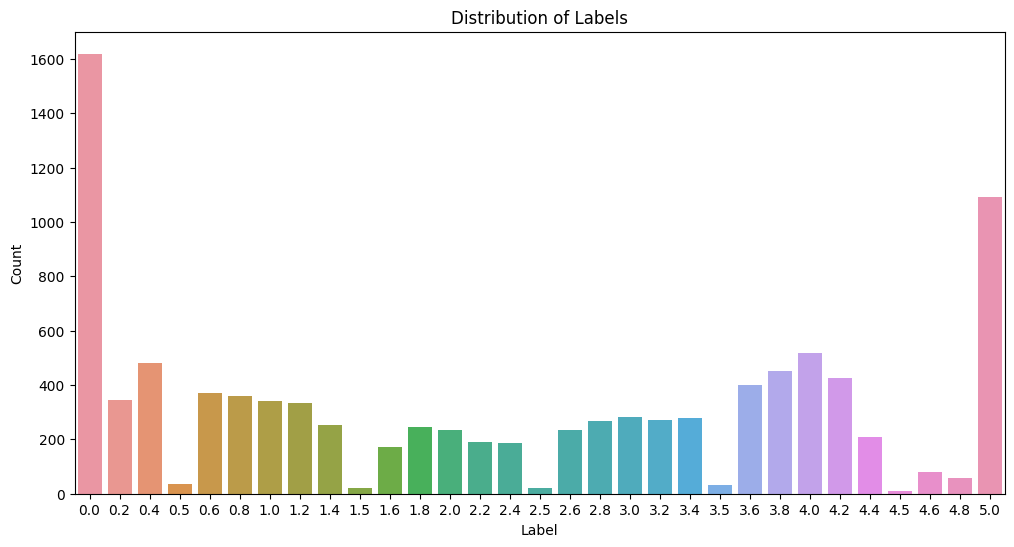

In [57]:
#데이터 시각화 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/modified_train_dataset.csv')
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()